<a href="https://colab.research.google.com/github/nathanbarry474/google-colab-notebooks/blob/master/CatvDog_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torchvision.utils import make_grid
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import os
from PIL import Image
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

# Messing with the dataset

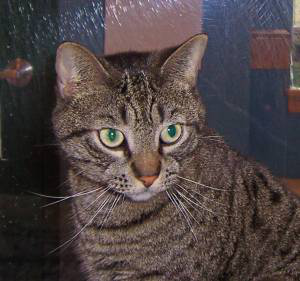

In [ ]:
with Image.open('/content/drive/My Drive/Programming/Data/PetImages/Cat/1.jpg') as im:
  display(im)

In [ ]:
from fastai.vision import *
verify_images(dataset_home, delete=True)

In [ ]:
  path = '/content/drive/My Drive/Programming/Data/PetImages/'
  img_names = []

  for folder, subfolders, filenames in os.walk(path):
    for img in filenames:
      img_names.append(folder+'/'+img)

In [ ]:
len(img_names)

25002

In [ ]:
img_names[0]

'/content/drive/My Drive/Programming/Data/PetImages/Cat/9588.jpg'

In [ ]:
dog = Image.open('/content/drive/My Drive/Programming/Data/PetImages/Dog/0.jpg')

None


In [ ]:
dog.size

(500, 375)

In [ ]:
transform = transforms.Compose([transforms.RandomHorizontalFlip(p=0.4),
                                transforms.RandomRotation(20),
                                transforms.Resize((128)),
                                transforms.CenterCrop(128),
                                transforms.ToTensor()])

im = transform(dog)
print(type(im))
print(im.shape)

NameError: ignored

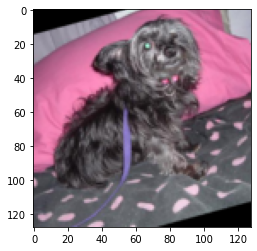

In [ ]:
plt.imshow(np.transpose(im.numpy(), (1,2,0)))

# Preprocessing the Data

In [ ]:
train_transform = transforms.Compose([transforms.RandomRotation(10),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.Resize(224),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

In [ ]:
test_transform = transforms.Compose([transforms.Resize(224),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

In [ ]:
dataset_home = '/content/drive/My Drive/Programming/Data/PetImages/'

data = datasets.ImageFolder(dataset_home, transform=train_transform)

In [ ]:
def FolderSize(path):
  _, _, files = next(os.walk(path))
  return len(files)

In [ ]:
dog_size = FolderSize(dataset_home + 'Dog')
cat_size = FolderSize(dataset_home + 'Cat')
file_len = dog_size + cat_size -2

In [ ]:
len(data)

24998

In [ ]:
val_size = .2

train_size = int((1-val_size) * file_len)
val_size = file_len - train_size

train_data, val_data = torch.utils.data.random_split(data, [train_size, val_size])

In [ ]:
batch_size = 10

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)
print(len(train_loader))

2000


# Messing with the dataset even more


In [ ]:
for images, labels in train_loader:
  break

In [ ]:
images.shape

torch.Size([10, 3, 224, 224])

In [ ]:
labels

tensor([1, 1, 1, 2, 2, 1, 1, 2, 2, 2])

In [ ]:
im = make_grid(images, nrow=10)

inv_normalize = transforms.Normalize(mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
                                     std=[1/0.229, 1/0.224, 1/0.225])
im_inv = inv_normalize(im)

plt.figure(figsize=(12,4))
plt.imshow(np.transpose(im_inv.numpy(), (1, 2, 0)))

NameError: ignored

In [ ]:
train_data[3]

(tensor([[[ 0.4166,  0.4166,  0.4166,  ..., -2.1179, -2.1179, -2.1179],
          [ 0.3823,  0.3823,  0.3994,  ..., -2.1179, -2.1179, -2.1179],
          [ 0.3652,  0.3652,  0.3823,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-2.1179, -2.1179, -2.1179,  ...,  0.1597,  0.1597,  0.1597],
          [-2.1179, -2.1179, -2.1179,  ...,  0.1597,  0.1768,  0.1768],
          [-2.1179, -2.1179, -2.1179,  ...,  0.1768,  0.1939,  0.1939]],
 
         [[ 0.0301,  0.0301,  0.0301,  ..., -2.0357, -2.0357, -2.0357],
          [-0.0049, -0.0049,  0.0126,  ..., -2.0357, -2.0357, -2.0357],
          [-0.0224, -0.0224,  0.0126,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [-2.0357, -2.0357, -2.0357,  ..., -0.2500, -0.2500, -0.2500],
          [-2.0357, -2.0357, -2.0357,  ..., -0.2500, -0.2325, -0.2325],
          [-2.0357, -2.0357, -2.0357,  ..., -0.2325, -0.2150, -0.2150]],
 
         [[-0.3753, -0.3753, -0.3578,  ..., -1.8044, -1.8044, -1.8044],
          [-0.4101, -0.3927,

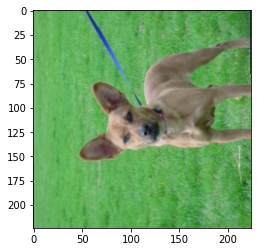

In [ ]:
im = train_data[0][0]

inv_normalize = transforms.Normalize(mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
                                     std=[1/0.229, 1/0.224, 1/0.225])
im_inv = inv_normalize(im)

plt.figure(figsize=(4,4))
plt.imshow(np.transpose(im_inv.numpy()))

In [ ]:
data[0][1]

0

# Creating the CNN

In [ ]:
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 6, 3, 1)
    self.conv2 = nn.Conv2d(6, 16, 3, 1)
    self.fc1 = nn.Linear(54*54*16, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 2)

  def forward(self, X):
    X = F.max_pool2d(F.relu(self.conv1(X)), 2, 2)
    X = F.max_pool2d(F.relu(self.conv2(X)), 2, 2)
    X = X.view(-1, 54*54*16)
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = F.log_softmax(self.fc3(X), dim=1)
    return X

In [ ]:
torch.manual_seed(42)
model = ConvolutionalNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training the CNN

In [ ]:
import time
start_time = time.time()

epochs = 1
max_train_batch = 800
max_test_batch = 300

train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
  trn_correct = 0
  tst_correct = 0
  
  for b, (X_train, y_train) in enumerate(train_loader):
    if b == max_train_batch:
      break
    b += 1
    
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    predicted = torch.max(y_pred.data, 1)[1]
    batch_correct = (predicted == y_train).sum()
    trn_correct += batch_correct

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if b%20 == 0:
      print(f'Epoch {i} LOSS: {loss.item()}')

  train_losses.append(loss)
  train_correct.append(trn_correct)

  with torch.no_grad():
    for b, (X_test, y_test) in enumerate(val_loader):
      if b == max_test_batch:
        break
      
      y_val = model(X_test)

      predicted = torch.max(y_pred.data, 1)[1]
      batch_correct = (predicted == y_test).sum()
      tst_correct += batch_correct

  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(tst_correct)

total_time = time.time() - start_time
print(f'Total Time: {total_time/60} minutes')

Epoch 0 LOSS: 0.696058452129364
Epoch 0 LOSS: 0.6852158904075623
Epoch 0 LOSS: 0.6385260224342346
Epoch 0 LOSS: 0.6792334914207458
Epoch 0 LOSS: 0.6738685965538025
Epoch 0 LOSS: 0.6981036067008972
Epoch 0 LOSS: 0.7210835218429565
Epoch 0 LOSS: 0.7009512186050415
Epoch 0 LOSS: 0.7254654169082642
Epoch 0 LOSS: 0.651884913444519
Epoch 0 LOSS: 0.581373929977417
Epoch 0 LOSS: 0.5591617822647095
Epoch 0 LOSS: 0.6259689331054688
Epoch 0 LOSS: 0.7791346311569214
Epoch 0 LOSS: 0.6029787659645081
Epoch 0 LOSS: 0.5774510502815247
Epoch 0 LOSS: 0.7190501689910889
Epoch 0 LOSS: 0.8019925951957703
Epoch 0 LOSS: 0.7049285769462585
Epoch 0 LOSS: 0.698656439781189
Epoch 0 LOSS: 0.7574010491371155
Epoch 0 LOSS: 0.5715992450714111
Epoch 0 LOSS: 0.5910760164260864
Epoch 0 LOSS: 0.7957953214645386
Epoch 0 LOSS: 0.7711507081985474
Epoch 0 LOSS: 0.6439983248710632
Epoch 0 LOSS: 0.6486842036247253
Epoch 0 LOSS: 0.6394540667533875
Epoch 0 LOSS: 0.6123068928718567
Epoch 0 LOSS: 0.7315298318862915
Epoch 0 LOSS: 

In [ ]:
torch.save(model.state_dict(), 'myfirstmodel.pt')

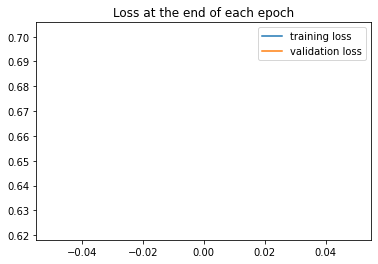

In [ ]:
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

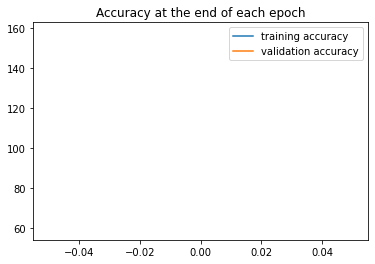

In [ ]:
plt.plot([t/80 for t in train_correct], label='training accuracy')
plt.plot([t/30 for t in train_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();

In [ ]:
100*test_correct[-1].item()/3000

48.166666666666664

# Transfer Learning

In [ ]:
ResNetModel = models.resnet34(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [ ]:
for param in ResNetModel.parameters():
  param.requires_grad = False

In [ ]:
ResNetModel

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
torch.manual_seed(42)

ResNetModel.fc = nn.Sequential(nn.Linear(512, 128), nn.ReLU(), nn.Dropout(0.5), nn.Linear(128, 2), nn.LogSoftmax(dim=1))

In [ ]:
ResNetModel

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
for param in ResNetModel.parameters():
  print(param.numel())

9408
64
64
36864
64
64
36864
64
64
36864
64
64
36864
64
64
36864
64
64
36864
64
64
73728
128
128
147456
128
128
8192
128
128
147456
128
128
147456
128
128
147456
128
128
147456
128
128
147456
128
128
147456
128
128
294912
256
256
589824
256
256
32768
256
256
589824
256
256
589824
256
256
589824
256
256
589824
256
256
589824
256
256
589824
256
256
589824
256
256
589824
256
256
589824
256
256
589824
256
256
1179648
512
512
2359296
512
512
131072
512
512
2359296
512
512
2359296
512
512
2359296
512
512
2359296
512
512
32768
128
256
2


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(ResNetModel.fc.parameters(), lr=0.001)

In [ ]:
import time
start_time = time.time()

epochs = 1

max_train_batch = 800
max_test_batch = 300

train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
  trn_correct = 0
  tst_correct = 0
  
  for b, (X_train, y_train) in enumerate(train_loader):
    if b == max_train_batch:
      break
    b += 1
    
    y_pred = ResNetModel(X_train)
    loss = criterion(y_pred, y_train)

    predicted = torch.max(y_pred.data, 1)[1]
    batch_correct = (predicted == y_train).sum()
    trn_correct += batch_correct

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if b%50 == 0:
      print(f'Epoch {i} LOSS: {loss.item()}')

  train_losses.append(loss)
  train_correct.append(trn_correct)

  with torch.no_grad():
    for b, (X_test, y_test) in enumerate(val_loader):
      if b == max_test_batch:
        break
      
      y_val = ResNetModel(X_test)

      predicted = torch.max(y_pred.data, 1)[1]
      batch_correct = (predicted == y_test).sum()
      tst_correct += batch_correct

  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(tst_correct)

total_time = time.time() - start_time
print(f'Total Time: {total_time/60} minutes')

Epoch 0 LOSS: 0.767989993095398
Epoch 0 LOSS: 0.7091634273529053
Epoch 0 LOSS: 0.6701663136482239
Epoch 0 LOSS: 0.7570152878761292


KeyboardInterrupt: ignored

In [ ]:
print(test_correct[-1].item()/3000)

In [ ]:
image_index = 2019

im = inv_normalize(test_data)